# TextBlob
###  Identifying and categorizing opinions from a piece of text

In [97]:
from textblob import TextBlob

In [98]:
testsample1 = TextBlob("Textblob is amazingly simple to use. What great fun!")
testsample1.sentiment

Sentiment(polarity=0.39166666666666666, subjectivity=0.4357142857142857)

In [99]:
testsample2 = TextBlob("Their customer service is a totally nightmare, very bad, I would not go again.")
testsample2.sentiment

Sentiment(polarity=-0.4549999999999999, subjectivity=0.8083333333333333)

# Stock Sentiment Analysis
### The data set is a combination of the world news and stock price shifts.
### Data ranges from 2000 to 2016.
### There are 25 columns of top news headlines for each day in the data frame.
### 'Label' : Class 1- the stock price increased. Class 0- the stock price stayed the same or decreased.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
# データを読み込む
df=pd.read_csv('Stock_Dataa.csv',encoding = "ISO-8859-1")

In [102]:
# データ中身をチェック、日付、Label：１は株価が上がる、０は前日と同じか下がった、TOPニュース
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


In [103]:
# データを訓練データとテストデータに分ける
train=df[df['Date']<'20150101']
test=df[df['Date']>'20141231']
print(train.shape)
print(test.shape)

(3975, 27)
(378, 27)


In [104]:
#　訓練データのデータ処理：Removing punctuations、大文字を小文字に変換
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite


In [105]:
# F-IDFを計算するための事前準備、毎日のTOP25個のニュースヘッドラインを一つの文章に収める
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [106]:
# For example, index 1
' '.join(str(x) for x in data.iloc[1,0:25])

'scorecard the best lake scene leader  german sleaze inquiry cheerio  boyo the main recommendations has cubie killed fees  has cubie killed fees  has cubie killed fees  hopkins  furious  at foster s lack of hannibal appetite has cubie killed fees  a tale of two tails i say what i like and i like what i say elbows  eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man s extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn t know without the movies millennium bug fails to bite'

In [107]:
# TF-IDFとRandom Forestのモジュールを導入し、訓練データのニュースヘッドラインのTF-IDFを計算
from sklearn.feature_extraction.text import TfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.ensemble import RandomForestClassifier
#implement TF-IDF
tfvector=TfidfVectorizer(ngram_range=(2,2))
train_df=tfvector.fit_transform(headlines)

In [108]:
# TF-IDFの結果と株価動向のデータをrandomclassifierでモデル訓練
randomclassifier=RandomForestClassifier(random_state=123)
randomclassifier.fit(train_df,train['Label'])

RandomForestClassifier(random_state=123)

In [109]:
# テストデータと訓練したモデルを使って、株価動向を予測
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = tfvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

[[152  34]
 [ 22 170]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       186
           1       0.83      0.89      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

Confusion matrix, without normalization


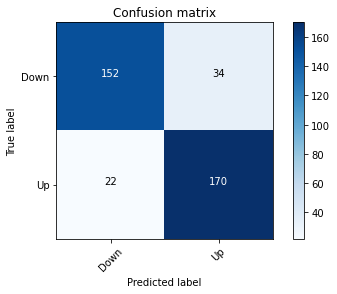

In [110]:
# 予測のパフォーマンスを評価
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

In [66]:
#normalization
math.sqrt(1.1699250014423124**2+1.415037499278844**2+1+1+1)

2.5240950127451858

In [67]:
1.1699250014423124/2.5240950127451858

0.463502758626313

In [68]:
1.415037499278844/2.5240950127451858

0.5606118201310736

In [60]:
import math
1*math.log2((1+4)/(1+3)+1) #document

1.1699250014423124

In [63]:
1*math.log2((1+4)/(1+2)+1) #first

1.415037499278844

In [61]:
1*math.log2((1+4)/(1+4)+1) #This, is, the,

1.0

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [20]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [23]:
print(X.toarray())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this document the first document?',
 ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [42]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 2 1 1 0 0 1 0 1]]


In [43]:
print(X)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	2


In [33]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()

['and this',
 'document is',
 'first document',
 'is the',
 'is this',
 'second document',
 'the first',
 'the second',
 'the third',
 'third one',
 'this document',
 'this is',
 'this the']

In [34]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]
